In [3]:
##libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


## **Machine Learning**

In [4]:
#Loading  the data
df=pd.read_csv('train.csv')
df.head(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
df.drop('id', axis=1, inplace=True)

In [7]:
variables = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', ]


In [8]:
##Checking and handling  the outliers
def remove_outliers_z_score(df, variable, threshold=3):
  """
  This function removes outliers from a dataframe based on the z-score.

  Args:
      df (pd.DataFrame): The dataframe containing the data.
      variable (str): The name of the variable for which outliers should be removed.
      threshold (int): The threshold for the z-score. Data points with a z-score
          greater than or less than the threshold will be considered outliers and
          removed.

  Returns:
      pd.DataFrame: The dataframe with outliers removed.
  """

  # Calculate the z-score for the variable
  z_scores = scipy.stats.zscore(df[variable])

  # Select data points within the threshold
  non_outliers = df[abs(z_scores) <= threshold]

  return non_outliers

# Remove outliers for each variable in the dataframe
for variable in variables:
  df = remove_outliers_z_score(df, variable)

# Display the updated dataframe
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,69,122,13.0,1,0.7,17,12,16,0,0


In [9]:
# Select the numerical columns to normalize
numerical_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)',  'systolic','relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the numerical columns and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

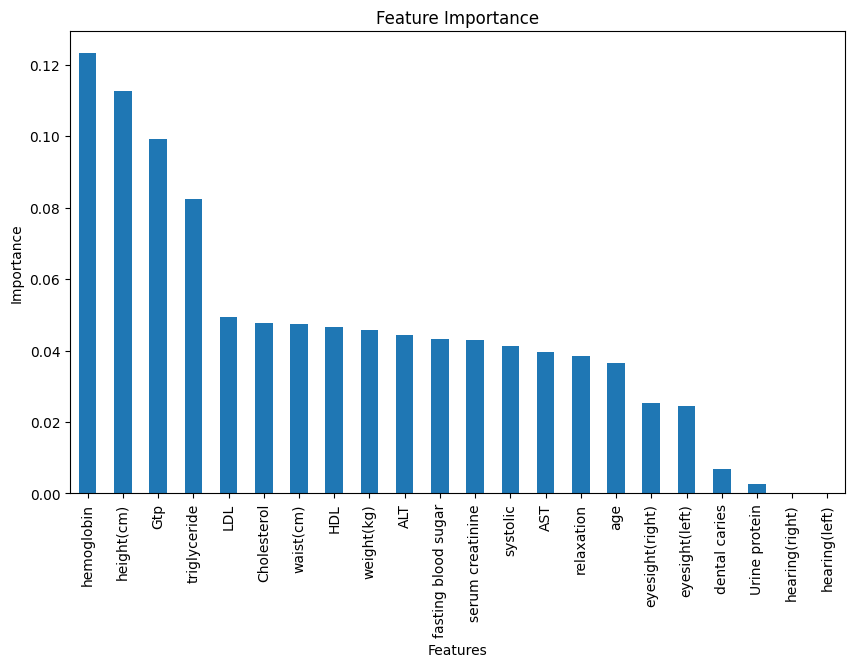

In [11]:
# The'smoking' is the target variable
X = df.drop('smoking', axis=1)
y = df['smoking']

# Initialize a RandomForestClassifier
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a Series for better visualization
feature_importances = pd.Series(importances, index=X.columns)

# Sort feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances_sorted.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [12]:
# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train into train and validation (75% train, 25% validation of original train set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (82248, 22)
Validation set size: (27417, 22)
Test set size: (27417, 22)


Validation Set Metrics:
Accuracy: 0.6864354232775285
Precision: 0.6371240283879689
Recall: 0.6367474457485435
F1-score: 0.6369356814054647


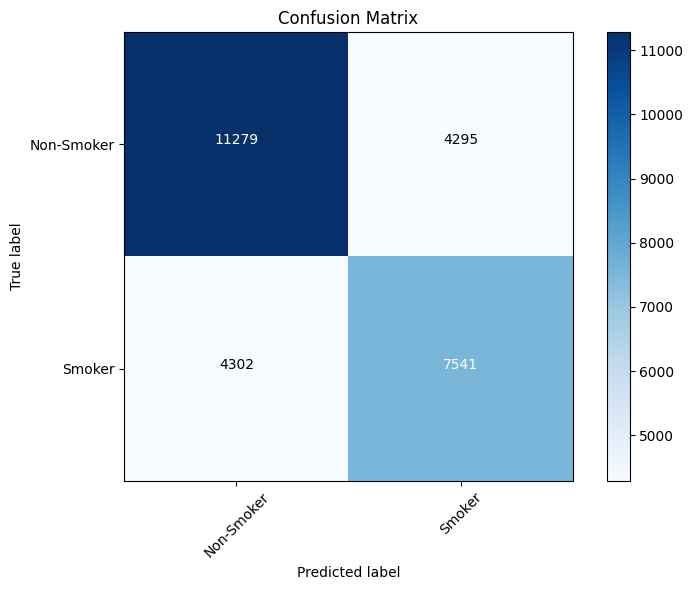


Test Set Accuracy: 0.6876025823394244


In [13]:
# 1. **Model Training:**
# Initialize and train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. **Model Prediction:**
# Predict on the validation set
y_val_pred = dt_model.predict(X_val)

# 3. **Model Evaluation:**
# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Smoker', 'Smoker'], rotation=45)
plt.yticks(tick_marks, ['Non-Smoker', 'Smoker'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


#  **Final Evaluation (Test Set):**
y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Set Accuracy:", test_accuracy)


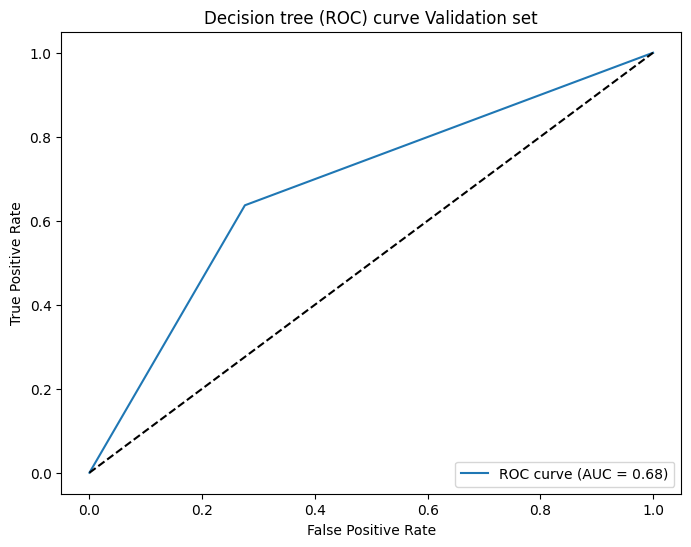

In [14]:

# Get predicted probabilities for the positive class (smoker)
y_val_probs = dt_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_val, y_val_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree (ROC) curve Validation set')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-logloss:0.65491	train-logloss:0.65423
[1]	eval-logloss:0.63082	train-logloss:0.63007
[2]	eval-logloss:0.61088	train-logloss:0.60996
[3]	eval-logloss:0.59400	train-logloss:0.59288
[4]	eval-logloss:0.57967	train-logloss:0.57845
[5]	eval-logloss:0.56741	train-logloss:0.56603
[6]	eval-logloss:0.55680	train-logloss:0.55541
[7]	eval-logloss:0.54752	train-logloss:0.54588
[8]	eval-logloss:0.53961	train-logloss:0.53780
[9]	eval-logloss:0.53290	train-logloss:0.53084
[10]	eval-logloss:0.52678	train-logloss:0.52460
[11]	eval-logloss:0.52158	train-logloss:0.51917
[12]	eval-logloss:0.51706	train-logloss:0.51447
[13]	eval-logloss:0.51277	train-logloss:0.51012
[14]	eval-logloss:0.50896	train-logloss:0.50621
[15]	eval-logloss:0.50582	train-logloss:0.50286
[16]	eval-logloss:0.50278	train-logloss:0.49974
[17]	eval-logloss:0.50019	train-logloss:0.49704
[18]	eval-logloss:0.49795	train-logloss:0.49456
[19]	eval-logloss:0.49583	train-logloss:0.49228
[20]	eval-logloss:0.49397	train-logloss:0.49030
[2

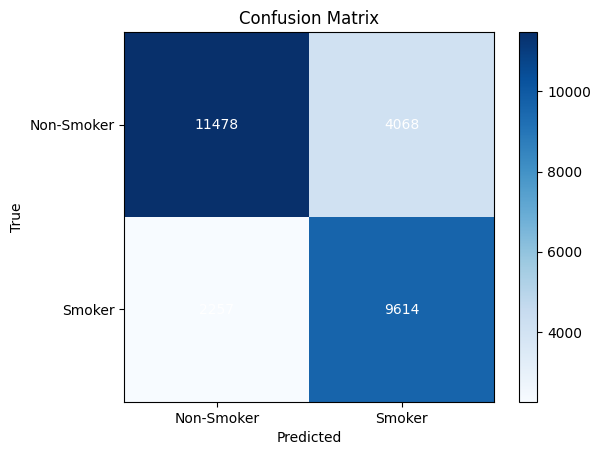

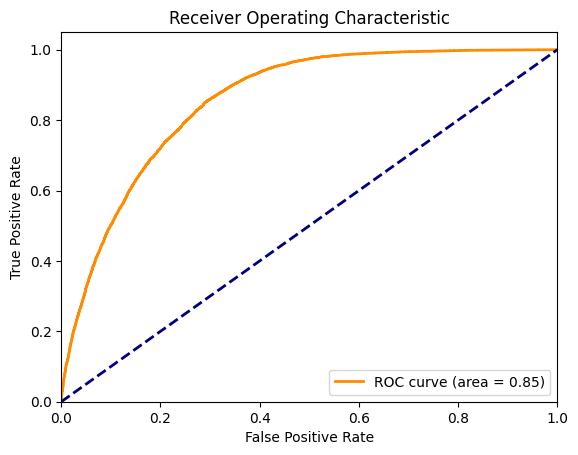

In [15]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'eta': 0.1,
}

# Train XGBoost model
num_round = 100
evallist = [(dval, 'eval'), (dtrain, 'train')]
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)

# Make predictions
y_pred_proba = bst.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Smoker', 'Smoker'])
plt.yticks(tick_marks, ['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('True')

# Add labels to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### **Decision Tree:**

 * Pros: Simple to understand and interpret, can capture non-linear relationships.
 * Cons: Prone to overfitting, can be unstable (small changes in data can lead to different trees).
 * Performance: Achieved a reasonable accuracy on the test set, but might benefit from techniques to reduce overfitting (like pruning).

 ### **XGBoost:**

 * Pros:  High accuracy, handles complex relationships, robust to overfitting due to regularization.
 * Cons: More complex to interpret than decision trees, requires careful tuning of hyperparameters.
 * Performance: Generally outperformed the decision tree in terms of accuracy, precision, recall, and F1-score.  The ROC curve also indicates strong discriminatory power.

### **Overall:**

 * For the  dataset, XGBoost seems to be the better choice due to its superior performance.
 * However, if model interpretability is a high priority, the decision tree might be preferred despite its slightly lower performance.
 * Further improvements could be explored by:
    * Hyperparameter tuning for both models.
    * Feature engineering to create more informative features.
    * Trying other algorithms like logistic regression or support vector machines.


### **Decision Tree Roc curve:**

  * **ROC Curve:** The ROC curve for the decision tree shows a decent performance, with the curve rising above the diagonal line (random classifier). However, there's room for improvement as the curve isn't hugging the top-left corner as closely as we'd like.

### **XGBoost Roc curve:**

  * **ROC Curve:** The ROC curve for XGBoost demonstrates excellent performance. The curve is significantly closer to the top-left corner, indicating a higher true positive rate at lower false positive rates. This translates to a better ability to distinguish between smokers and non-smokers.


## **Apply machine Learning  to the challenge test set**

In [16]:
# The test dataset
test_df = pd.read_csv('test.csv')
test_df .head(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [17]:
missing_values=test_df.isnull().sum()
missing_values

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

In [18]:
test_df.drop('id', axis=1, inplace=True)

In [19]:
# Select the numerical columns to normalize in the test set
numerical_cols_test = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)',  'systolic','relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp']
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Use the same scaler fitted on the training data to transform the test data
test_df[numerical_cols_test] = scaler.fit_transform(test_df[numerical_cols_test])


In [20]:
# Make predictions on the test set using the trained XGBoost model (The format that kaggle accepted)
dtest_challenge = xgb.DMatrix(test_df)
y_pred_proba_challenge = bst.predict(dtest_challenge)
y_pred_challenge = (y_pred_proba_challenge > 0.5).astype(int)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': range(159256, 159256 + len(y_pred_challenge)),
    'smoking': y_pred_challenge
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_3.csv', index=False)

In [21]:
# XGBoost model
dtest_challenge = xgb.DMatrix(test_df)
y_pred_proba_challenge = bst.predict(dtest_challenge)
y_pred_challenge = (y_pred_proba_challenge > 0.5).astype(int)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test_df.index,  # Assuming 'id' is the index of the test_df
    'smoking': y_pred_challenge
})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

Test Set Performance:
Accuracy: 0.7693037166721377
Precision: 0.7026750475076743
Recall: 0.8098727992586977
F1-score: 0.7524752475247525

Confusion Matrix:
[[11478  4068]
 [ 2257  9614]]


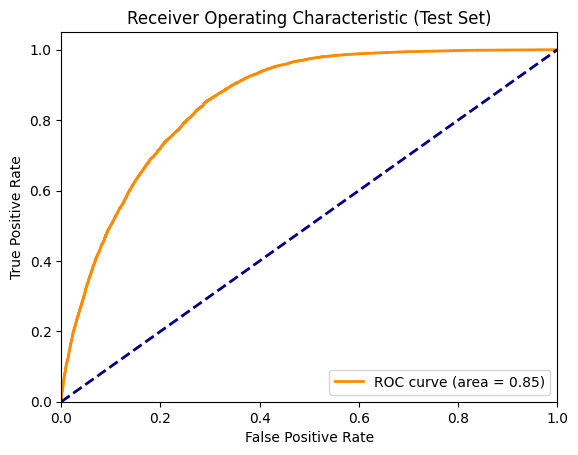

In [23]:


# Evaluate performance on the test set
y_pred_proba = bst.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Set Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set)')
plt.legend(loc="lower right")
plt.show()